In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy.io

In [76]:
part = '1' #praticipant
trial = '1'

data_path = '../../Data_GIW/CleanedProcessedData/PrIdx_'+part+'_TrIdx_'+trial+'.mat'
label_path = '../../Data_GIW/Labels/PrIdx_'+part+'_TrIdx_'+trial+'_Lbr_*.mat'
label_path = glob.glob(label_path)[0]

In [77]:
data_mat  = scipy.io.loadmat(data_path)
label_mat = scipy.io.loadmat(label_path)

In [78]:
def print_occur(lst):
    # Count the number of occurrences of each value
    unique_values, value_counts = np.unique(lst, return_counts=True)

    # Print the results
    for value, count in zip(unique_values, value_counts):
        print(f"{value}: {count}")

In [79]:
def reduce_blocks(lst):
    reduced_lst = [lst[0][0]]
    counts_lst = []

    current_count = 1

    for i in range(1, len(lst)):
        if lst[i] != lst[i-1]:
            reduced_lst.append(lst[i][0])
            counts_lst.append(current_count)
            current_count = 1
        else:
            current_count += 1

    counts_lst.append(current_count)

    return reduced_lst, counts_lst

In [81]:
label_time = label_mat['LabelData']['T'][0][0][0]
labels_mat = label_mat['LabelData']['Labels'][0][0]
label_list, label_list_counts = reduce_blocks(labels_mat)
print(label_time)

[0.00000000e+00 3.33336988e-03 6.66673976e-03 ... 3.22930207e+02
 3.22933541e+02 3.22936874e+02]


In [ ]:
label_time_ =  

In [7]:
giw_time = data_mat['ProcessData']['T'][0][0][:,0]
giwVector = data_mat['ProcessData']['GIW'][0][0][0][0][0]
giwVector_x = giwVector[:, 0]
giwVector_y = giwVector[:, 1]
giwVector_z = giwVector[:, 2]


In [74]:
first_fix_idx = label_list.index(1)
print(label_list[first_fix_idx+1:])
first_fix_idx += label_list[first_fix_idx+1:].index(1) +1
print(first_fix_idx)
start = sum(label_list_counts[0:first_fix_idx])
end = start + label_list_counts[first_fix_idx]
sun_arr = giwVector[start:end]
giwVector_x = sun_arr[:, 0]
giwVector_y = sun_arr[:, 1]
giwVector_z = sun_arr[:, 2]


[3, 1, 3, 1, 3, 1, 4, 0, 3, 1, 4, 1, 3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 0, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 0, 4, 1, 3, 1, 3, 2, 4, 1, 3, 2, 3, 1, 3, 1, 4, 1, 3, 1, 3, 2, 3, 2, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 4, 2, 3, 1, 3, 1, 3, 1, 2, 3, 2, 4, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 4, 0, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 0, 3, 1, 3, 1, 4, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 4, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 2, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 4, 1, 3, 1, 3, 1, 3, 1, 2, 3, 2, 3, 1, 3, 1, 4, 1, 4, 1, 3, 1, 2, 3, 2, 4, 1, 4, 2, 3, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 4, 1, 0, 3, 1, 4, 1, 3, 1, 3, 1, 2, 3, 1, 3, 1, 3, 2, 3, 1, 3, 0, 4, 2, 3, 2, 3, 2, 4, 1, 3, 1, 3, 2, 4, 1, 4, 1, 3, 1, 3, 1, 4, 2, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 0, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 3, 2, 3, 2, 4, 1, 3, 1, 3, 1, 3, 

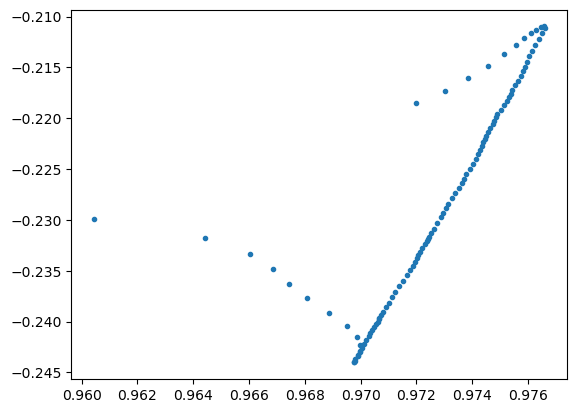

In [75]:
x = giwVector_x
y = giwVector_y
idx = np.arange(len(x)) # % 50 ==0
plt.plot(x[idx], y[idx],'.')

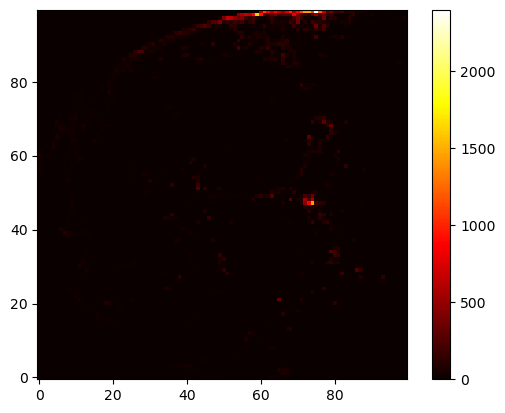

In [9]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
plt.imshow(heatmap, cmap='hot', origin='lower')
plt.colorbar()